## <center> Assignment 01
## <center> Course: ML1    
## <center> Instructor: Dr. Tariq Mahmood

### <center> Submitted By:
#### <center> Muhammad Uzair 29414
#### <center> Areeb Asif 14101

#### <center> 
#### <center> Hepatitis C Virus (HCV) for Egyptian patients
https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period. 

| Variable Name            | Role    | Type       | Demographic   | Description                             | Units | Missing Values |
|--------------------------|---------|------------|---------------|-----------------------------------------|-------|----------------|
| Administrative           | Feature | Integer    |               | Number of administrative pages visited  |       | no             |
| Administrative_Duration  | Feature | Integer    |               | Duration of administrative page visits  |       | no             |
| Informational            | Feature | Integer    |               | Number of informational pages visited    |       | no             |
| Informational_Duration   | Feature | Integer    |               | Duration of informational page visits    |       | no             |
| ProductRelated           | Feature | Integer    |               | Number of product-related pages visited |       | no             |
| ProductRelated_Duration  | Feature | Continuous |               | Duration of product-related page visits |       | no             |
| BounceRates              | Feature | Continuous |               | Bounce rate                              |       | no             |
| ExitRates                | Feature | Continuous |               | Exit rate                                |       | no             |
| PageValues               | Feature | Integer    |               | Page values                              |       | no             |
| SpecialDay               | Feature | Integer    |               | Special day indicator                    |       | no             |
| Month                    | Feature | Categorical|               | Month of the year                        |       | no             |
| OperatingSystems         | Feature | Integer    |               | Operating system used by the visitor     |       | no             |
| Browser                  | Feature | Integer    |               | Browser used by the visitor              |       | no             |
| Region                   | Feature | Integer    |               | Region of the visitor                    |       | no             |
| TrafficType              | Feature | Integer    |               | Type of traffic                          |       | no             |
| VisitorType              | Feature | Categorical|               | Type of visitor                          |       | no             |
| Weekend                  | Feature | Binary     |               | Indicates if the visit occurred on a weekend |       | no             |
| Revenue                  | Target  | Binary     |               | Indicates if the visit resulted in revenue |       | no             |


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder


In [5]:
# file path
filepath = 'online_shoppers_intention.csv'
target = 'Revenue'

In [6]:

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def clean_data(df):
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df):
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

def transform_data1(df):
    binary_categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() == 2:
            binary_categorical_cols.append(col)

    for col in binary_categorical_cols:
        df[col] = df[col].map({'yes': True, 'no': False, 'Male': True, 'Female': False})
        
    return df

def eda(df):
    summary_stats = df.describe()
    float_cols = df.select_dtypes(include=['float64']).columns
    
    num_cols = len(float_cols)
    num_rows = (num_cols + 2) // 3
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


def manual_split(df, target_column):
    if isinstance(target_column, list):
        target_column = target_column[0]
    
    # One-hot encoding for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Check if the target column is in the list of categorical columns
    if target_column in categorical_cols:
        # Remove the target column from the list of categorical columns
        categorical_cols.remove(target_column)
    else:
        print(f"Target column '{target_column}' is not found in the DataFrame's categorical columns.")
    
    # Perform one-hot encoding excluding the target column
    df = pd.get_dummies(df, columns=categorical_cols)

    # Label encoding for the target variable
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[target_column]),
        df[target_column],
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test
    

def model_selection():
    model = KNeighborsClassifier()
    return model
    
def cv_scores(model,X_train, y_train):  
    # Example: KNN Classifier
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores
    
def train_model(model,X_train,y_train):
    model.fit(X_train, y_train)

def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    if len(np.unique(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if len(np.unique(y_test)) > 2:
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc_dict = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
            roc_auc_dict[i] = auc(fpr[i], tpr[i])

            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (class {})'.format(i))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve - Class {}'.format(i))
            plt.legend(loc="lower right")
            plt.show()
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_rep)
    print("\nROC AUC Score:")
    print(roc_auc)



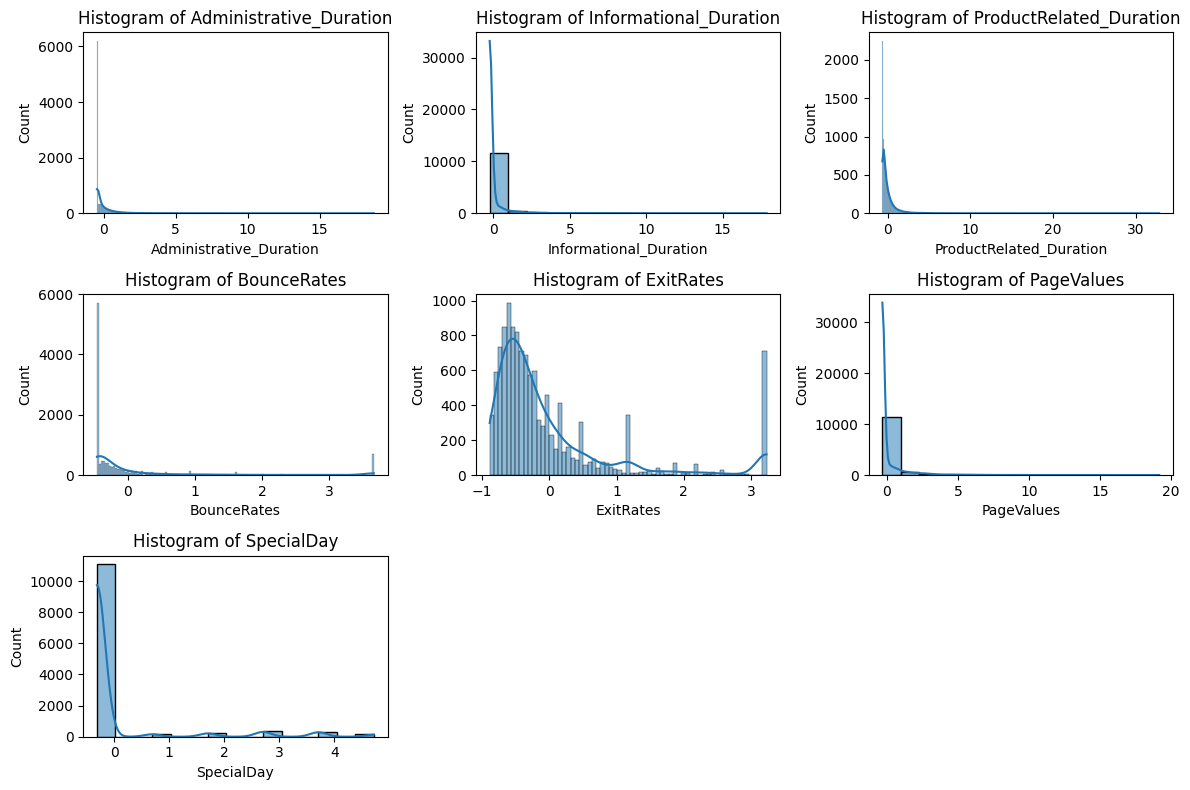

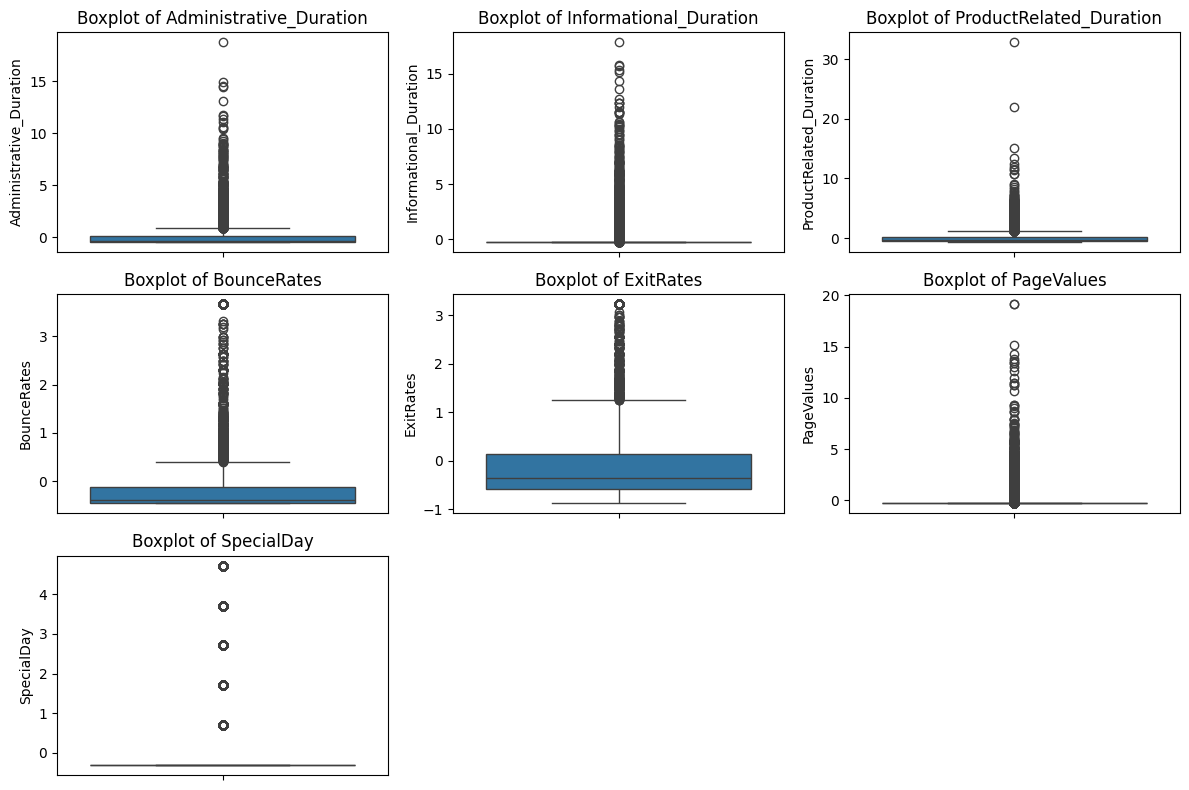

Target column 'Revenue' is not found in the DataFrame's categorical columns.


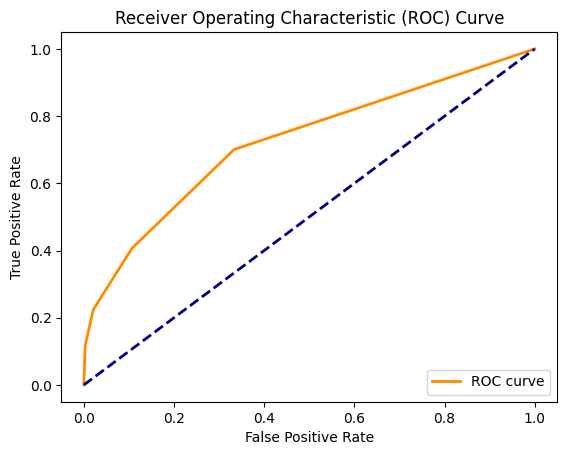


Evaluation Metrics:
Accuracy: 0.8532035685320357

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2055
           1       0.68      0.22      0.34       411

    accuracy                           0.85      2466
   macro avg       0.77      0.60      0.63      2466
weighted avg       0.83      0.85      0.82      2466


ROC AUC Score:
0.7226490489637168


In [7]:
# def master_pipeline(filepath, target_column):
#     print("Target Column:", target_column)
#     # rest of the code...

def master_pipeline(filepath,target):
    df = load_data(filepath)
    df = clean_data(df)
    df = transform_data(df)
    df = transform_data1(df)
    eda(df)
    X_train, X_test, y_train, y_test = manual_split(df, target)
    model = model_selection()
    cv_scores(model,X_train, y_train)
    train_model(model, X_train, y_train)
    evaluate_model(model, X_test, y_test)

# Example usage:
master_pipeline(filepath,target)


The evaluation metrics for the KNN classifier are as follows:

Accuracy: The accuracy of the classifier is 85.32%, indicating that it correctly predicts the class label for approximately 85.32% of the instances in the test set.

Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0, the precision is 0.86, which means that 86% of the instances predicted as class 0 are actually class 0. For class 1, the precision is lower at 0.68, indicating that only 68% of the instances predicted as class 1 are actually class 1.

Recall: Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances. For class 0, the recall is high at 0.98, indicating that 98% of all actual class 0 instances are correctly predicted as class 0. For class 1, the recall is lower at 0.22, suggesting that only 22% of all actual class 1 instances are correctly predicted as class 1.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is high at 0.92, indicating a good balance between precision and recall. For class 1, the F1-score is lower at 0.34, suggesting a trade-off between precision and recall.

ROC AUC Score: The ROC AUC score is 0.723, which indicates that the classifier performs reasonably well in distinguishing between the classes. A score closer to 1.0 suggests better performance.

Overall, the KNN classifier demonstrates strong performance in predicting class 0, as evidenced by high precision, recall, and F1-score for class 0. However, it performs less effectively in predicting class 1, as indicated by lower precision, recall, and F1-score for class 1. This suggests that the classifier may be biased towards predicting class 0 and may require further tuning or the consideration of alternative algorithms to improve its performance on class 1 predictions.